## K-Nearest Neighbors
KNN - K-Nearest Neighbors
KNN is a supervised machine learning algorithm.
that uses a set of training data to predict the class of an unlabeled data point.
Easiest and most intuitive implement ML algo.
Understand some distance metrics and how they work.
1. Minkowski distance
Consider 2 points A and B with coordinates $(x_1,y_1)$ and $(x_2,y_2)$.
then the minkowski distance is:

$ d = (|x_1 - x_2|^p + |y_1 - y_2|^p)^{1/p}$

where $p$ is the power parameter.

$p = 2$ for minkowski distance

2. Manhattan distance

$ p = 1$ for manhattan distance

$=> d = |x_1 - x_2| + |y_1 - y_2|$

3. Euclidian distance

$ p = 2$ for euclidian distance

$=> d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

In 3D - 
$ d = (|x_1 - x_2|^p + |y_1 - y_2|^p + |z_1 - z_2|)^{1/p}$

$ d = |x_1 - x_2| + |y_1 - y_2| + |z_1 - z_2|$

$ d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$

On generalizing to higher dimensions, we can use the formula:

$ d = \sqrt{ \sum_{i=1}^n (x_1 - x_2)^2 }$

where $n$ is the number of dimensions.

MD - $ d = (|x_1 - y_1|^p + |x_2 - y_2|^p +....+ |x_n - y_n|)^{1/p}$

Mand - $ d = |x_1 - y_1| + |x_2 - y_2| +...+ |x_n - y_n|$

Eucd - $ d = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 +...+ (x_n - y_n)^2}$

KNN is an algo that classifies a sample based on the classes of the samples that are close to it.

KNN approaches a problem by first choosing k-number of nearest neighbors. k ia a parameter determined by us.    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
x, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std=1.5, random_state=4)


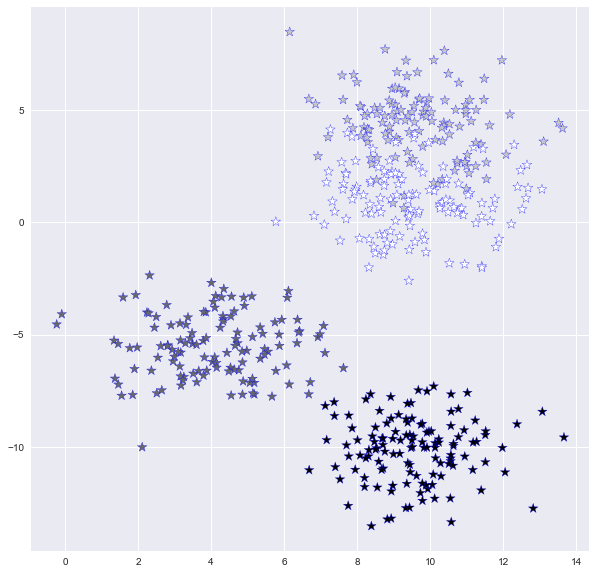

In [10]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y,s=100,edgecolors='blue',marker='*')
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:
len(x),len(y)

(500, 500)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(x_train, y_train)
knn1.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred1 = knn1.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

print('Accuracy of KNN with n_neighbors=5: ', accuracy_score(y_test, y_pred)*100)
print('Accuracy of KNN with n_neighbors=1: ', accuracy_score(y_test, y_pred1)*100)

Accuracy of KNN with n_neighbors=5:  93.60000000000001
Accuracy of KNN with n_neighbors=1:  90.4


Text(0.5, 1.0, 'Predicted values with n_neighbors=1')

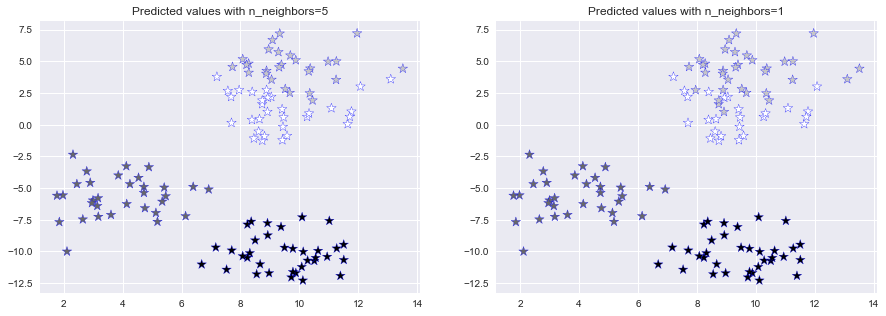

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred,s=100,edgecolors='blue',marker='*')
plt.title('Predicted values with n_neighbors=5')

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred1,s=100,edgecolors='blue',marker='*')
plt.title('Predicted values with n_neighbors=1')



In [22]:
# k = 1, model is too narrow and not properly generalized. It also has a high sensitivity to noise.
# k = 100, model is too broad and unreliable.likely will underfit

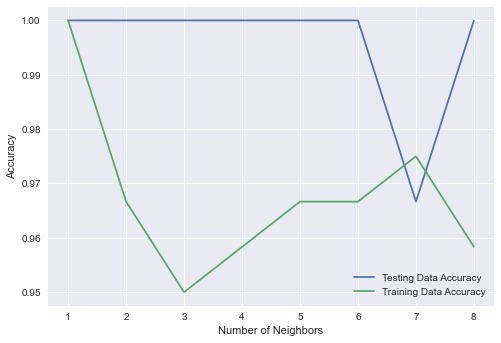

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)


plt.plot(neighbors, test_accuracy, label='Testing Data Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Data Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()



## Decision Trees
Decision Trees learning  apredictive modelling algo. It is used to address classification problems.
It is having a tree like stucture upside down and represents decisions for desicion making.
Can handle high dimension data and have good accuracy. DT algo can be applied on regression problems and classification problems. DT is a supervised learning algo.

How do we know which feature splits the target the best, for that we introduce the term impurity.  impurity measures the homogeneity of a feature.
The common way to measure impurity is using the 'gini-index' and 'gini-entropy'.

Use play tennis eg to compute the gini-index and entropy.

GI = 1 - prob('yes')^2 - prob('no')^2
sample = 14

$g1 = g(yes/yes) = 1 - (9/9)^2 - (0/9)^2 = 1 - 1^2 - 0^2 = 1 - 1 = 0$

$g2 = g(no/no) = 1 - (0/5)^2 - (5/5)^2 = 1 - 0^2 - 1^2 = 1 - 1 = 0$

$gi = (mood/playtennis) = (9/14)*g1 - (5/14)*g2 = 0$

so we get impurity = 0 which is ideal, so lower the impurity the better the feature seperates the target class.

$g1(sunny) = 1 - (2/5)^2 - (3/5)^2 = 1 - 0.16 - 0.36 = 1 - 0.52 = 0.48$

$g2(overcast) = 1 - (4/4)^2 - (0/4)^2 = 1 - 1^2 - 0^2 = 1 - 1 = 0$

$g3(rainy) = 1 - (3/5)^2 - (2/5)^2 = 1 - 0.36 - 0.16 = 1 - 0.52 = 0.48$

$G.I.(Outlook/Play Tennis) = (5/14)*g1 + (4/14)*g2 + (5/14)*g3 = (5/14)*0.48+ (4/14)*0+ (5/14)*0.48 = 0.342$

GI(temp/play tennis) = 0.4 # assuming
GI(Humidity/play tennis) = 0.7 # assuming
GI(Windy/play tennis) = 0.5 # assuming

For the given dataset with different features, to decide which feature to be consideered as the root node and which feature should be the next node and so on... Information gain of each feature must be known. The feature with maximum information gain is considered as my root node. In order to calculate I.G, we need to calculate entropy.

Entropy is a measure of impurity in the dataset.
Considering a collectionof samples S, containing positve and negative values of a target column.., the entropy of S is giecn by the formulaL

$Entropy(s) = -(P(+ve) log_2 P(+ve) + P(-ve) log_2 P(-ve))$

As per the tennis dataset wehave 5 negatives and 9 positives.

$E(s)= (\frac{9}{14})log_2(\frac{9}{14}) + (\frac{5}{14})log_2(\frac{9}{14}) = 0.94$

dataset has 94% impurity.

out of the 14 samples, 14 positives and 0 negatives, the entropy is 0
out of the 14 samples, 7 positives and 7 negatives, the entropy is 1

Information gain: given entropy is the measure of impurity in a colleciton of a dataset. We can measure the effectiveness of a feature in classifying the target. This measure is called IG.

IG(S,A) = Entropy(S) - Entropy(S,A)

Entopy(S,wind) has values Weak/Strong

S = [9+,5-]
S_weak = [6+,2-]
S_strong = [3+,3-]

IG(S,wind) = Entropy(S) - Entropy(S,wind) 

$Entropy(S) = (8/14) \times Entropy(S_weak) + (6/14) \times Entropy(S_strong)$

$Entrpoy(S_weak) = -((6/8)log_2(6/8) + (2/8)log_2(2/8)) = 0.811$

$Entrpoy(S_strong) = -((3/6)log_2(3/6) + (3/6)log_2(3/6))= 1$

Substituting eq 2 and 3 in 1, 

$G(S,wind) = 0.94 - ((8/14) \times 0.811 + (6/14) \times 1 )= 0.048$

Same for other features. ACTUALLY CALCULATE THESE <br>
G(S,Humidity) = 0.1 # assuming<br>
G(S,temp) = 0.4 # assuming<br>
G(S,Outlook) = 0.0001 # assuming<br>

This feature which will give you the highest IG will be considered as your root node. The new nodes will further be expanded by selecting atttributes with the highest ID relative to the new subset of attributes.
